<a href="https://colab.research.google.com/github/Naren1998/LLM-Assignments/blob/main/LLM_Assignment_1_Naren_Kosaraju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [329]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import spacy
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Loading The Dataset ###


df = pd.read_csv(r'/content/movie.csv',encoding='latin-1')
len(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


40000

In [330]:
#Find the total length of the dataset
len(df)

40000

In [306]:
#Load the spacy model and set the stop words

nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

In [331]:
#Create a function to clean the data

def preprocess_text(text):
   text = text.lower()
   text = text.translate(str.maketrans('', '', punctuations))
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
   return tokens

In [333]:
#Apply Preprocessing to the text column
new_df = df.iloc[:10000]
new_df
new_df['processed_text'] = new_df['text'].apply(preprocess_text)
new_df[['text', 'processed_text']]

<ipython-input-333-fb6ca261a566>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['processed_text'] = new_df['text'].apply(preprocess_text)


,text,processed_text
0,I grew up (b. 1965) watching and loving the Th...,"[grow, b, 1965, watch, love, thunderbird, mate..."
1,"When I put this movie in my DVD player, and sa...","[put, movie, dvd, player, sit, coke, chip, exp..."
2,Why do people who do not know what a particula...,"[people, know, particular, time, past, like, f..."
3,Even though I have great interest in Biblical ...,"[even, though, great, interest, biblical, movi..."
4,Im a die hard Dads Army fan and nothing will e...,"[die, hard, dad, army, fan, nothing, ever, cha..."
...,...,...
9995,This is one of the most cerebral insightful mo...,"[one, cerebral, insightful, movie, ever, see, ..."
9996,"First off, this movie is not near complete, my...","[first, movie, near, complete, guess, someone,..."
9997,What can be said about a movie about a cross d...,"[say, movie, cross, dressing, gangster, much, ..."
9998,"If you like adult comedy cartoons, like South ...","[like, adult, comedy, cartoon, like, south, pa..."


In [334]:
#Initialize the stemmer and lemmatizer
df = new_df
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [335]:
# Create a function for Stemming
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text])

# Create a function for lemmatization using NLTK

def lemmatize_text_nltk(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text])

# Apply Lemmatization and Stemming to the text column

df['stemmed_text'] = df['processed_text'].apply(stem_text)
df['lemmatized_text_nltk'] = df['processed_text'].apply(lemmatize_text_nltk)

In [336]:
df.count()

,0
text,10000
label,10000
processed_text,10000
stemmed_text,10000
lemmatized_text_nltk,10000


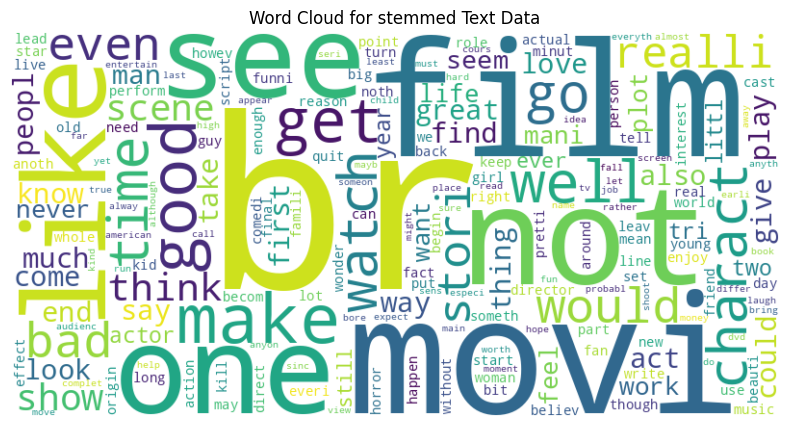

In [337]:
#Generate the word cloud for stemmed_text

import numpy as np
from collections import Counter
from PIL import Image
import random

#Combine all cleaned text into a single string

all_text_custom = ' '.join(df['stemmed_text'])

words = all_text_custom.split()
word_freq = dict(Counter(words))
wordcloud_custom_dict = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_custom_dict, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for stemmed Text Data')
plt.show()

In [338]:
# Print the sorted word frequencies

sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1],reverse = True)[:5])
print("Word Frequencies in Ascending Order:")
for word, freq in sorted_word_freq.items():
    print(f"{word}: {freq}")

Word Frequencies in Ascending Order:
br: 22819
movi: 19785
film: 18412
not: 13401
one: 10628


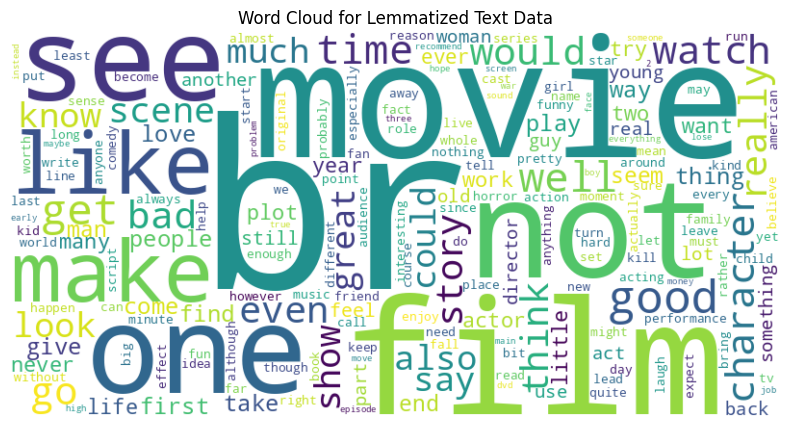

In [339]:
#Generate the word cloud for lemmatized_text
all_text_custom = ' '.join(df['lemmatized_text_nltk'])

words = all_text_custom.split()
word_freq = dict(Counter(words))
wordcloud_custom_dict = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_custom_dict, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lemmatized Text Data')
plt.show()


In [340]:
#SentimentAnalyzer
positive_words = set([
    'good', 'great', 'excellent', 'amazing', 'wonderful', 'fantastic', 'superb', 'love', 'like', 'enjoy',
    'happy', 'delightful', 'outstanding', 'brilliant', 'positive', 'success', 'satisfied', 'pleased', 'best', 'nice'
])

negative_words = set([
    'bad', 'terrible', 'awful', 'worst', 'poor', 'disappointing', 'hate', 'dislike', 'unhappy', 'sad',
    'horrible', 'negative', 'failure', 'dissatisfied', 'poorly', 'nasty', 'angry', 'worst', 'boring'
])

In [341]:
def calculate_sentiment_score(text):
    # Split the text into words
    words = text.split()
    # Calculate the number of positive and negative words
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)
    # Calculate the overall sentiment score
    sentiment_score = positive_count - negative_count
    return sentiment_score

In [348]:
df.head()

,text,label,processed_text,stemmed_text,lemmatized_text_nltk,sentiment_score,sentiment_score_1,sentiment_label,sentiment_label_1
0,I grew up (b. 1965) watching and loving the Th...,0,"[grow, b, 1965, watch, love, thunderbird, mate...",grow b 1965 watch love thunderbird mate school...,grow b 1965 watch love thunderbird mate school...,2,2,1,1
1,"When I put this movie in my DVD player, and sa...",0,"[put, movie, dvd, player, sit, coke, chip, exp...",put movi dvd player sit coke chip expect hope ...,put movie dvd player sit coke chip expectation...,6,6,1,1
2,Why do people who do not know what a particula...,0,"[people, know, particular, time, past, like, f...",peopl know particular time past like feel need...,people know particular time past like feel nee...,2,2,1,1
3,Even though I have great interest in Biblical ...,0,"[even, though, great, interest, biblical, movi...",even though great interest biblic movi bore de...,even though great interest biblical movie bore...,-1,0,0,0
4,Im a die hard Dads Army fan and nothing will e...,1,"[die, hard, dad, army, fan, nothing, ever, cha...",die hard dad armi fan noth ever chang get tape...,die hard dad army fan nothing ever change get ...,4,5,1,1


In [342]:
df['sentiment_score'] = df['lemmatized_text_nltk'].apply(calculate_sentiment_score)

df['sentiment_score_1'] = df['stemmed_text'].apply(calculate_sentiment_score)

# Assign sentiment labels based on the sentiment score

df['sentiment_label'] = df['sentiment_score'].apply(lambda score: 1 if score > 0 else 0)
df['sentiment_label_1'] = df['sentiment_score_1'].apply(lambda score: 1 if score > 0 else 0)

In [343]:
#Sentiment Label for stemmed text
df['sentiment_label'].value_counts()

,count
sentiment_label,
1,7009
0,2991


In [344]:
#Sentiment Label for Lemmatized text
df['sentiment_label_1'].value_counts()

,count
sentiment_label_1,
1,7329
0,2671


In [345]:
#Accuracy for stemmed Text
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['label'], df['sentiment_label'])
accuracy

0.668

In [346]:
#Accuracy for lemmatized Text
accuracy = accuracy_score(df['label'], df['sentiment_label_1'])
accuracy

0.6242